In [43]:
import numpy as np
import matplotlib.pyplot as plt
from sympy.physics.vector import dynamicsymbols
from sympy import symbols, cos, sin, diff, sqrt, init_printing, latex, Symbol, Eq, solve, lambdify
from scipy.integrate import solve_ivp 

latexReplaceRules = {
    r'{\left(t \right)}':r' ',
    r'\frac{d}{d t}':r'\dot',
    r'\frac{d^{2}}{d t^{2}}':r'\ddot',
}
def latexNew(expr,**kwargs):
    retStr = latex(expr,**kwargs)
    for _,__ in latexReplaceRules.items():
        retStr = retStr.replace(_,__)
    return retStr
init_printing(latex_printer=latexNew)

In [2]:
#can do constants w symbols. w variables, do dynamic symbols

#constants 
G, M, omega, me, ma, f, mu, a, tau = symbols(r"G, M_s, \Omega, m_e, m_a, f, \mu, a, \tau", real=True)

t=Symbol('t')

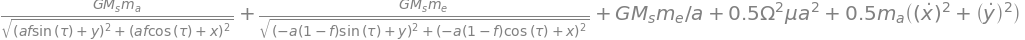

In [3]:
#degrees of freedom

x, y = dynamicsymbols("x, y", real=True) #add r if need to add slash
x_dot=x.diff()
y_dot=y.diff()

L= 0.5*ma*(x_dot**2+y_dot**2) + 0.5*mu*a**2 *omega**2 + G *M*me/a + G*M*ma/sqrt((x+(f*a*cos(omega*t)))**2+(y+f*a*sin(omega*t))**2)+ G*M*me/sqrt((x-((1-f)*a*cos(omega*t)))**2+(y-(1-f)*a*sin(omega*t))**2)

L=L.subs(omega*t, tau) #this is the nondimensionalization step w/ tau=t*omega 
L

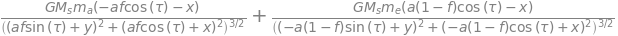

In [4]:
x_derivative=L.diff(x)

x_derivative

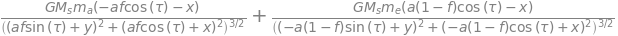

In [5]:
#RHS of Euler-Lagrange Equation for x 

x_derivative=L.diff(x)

x_derivative

In [6]:
#LHS of Euler-Lagrange Equation for x

x_dot_derivative=L.diff(x_dot)

x_dot_second_derivative= x_dot_derivative.diff(t) #maybe ask later

x_dot_second_derivative

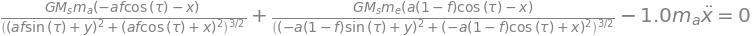

In [7]:
#Euler-Lagrange Equation for x 

ELx=Eq(x_derivative- x_dot_second_derivative,0)

ELx

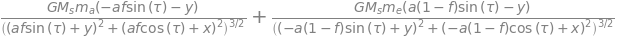

In [8]:
#RHS of y

y_derivative=L.diff(y)

y_derivative

In [9]:
#LHS of Euler-Lagrange Equation for y

y_dot_derivative=L.diff(y_dot)

y_dot_second_derivative= y_dot_derivative.diff(t) #maybe ask later

y_dot_second_derivative

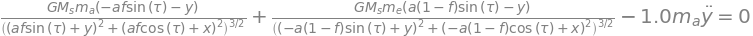

In [10]:
#Euler-Lagrange Equation for y

ELy=Eq(y_derivative- y_dot_second_derivative,0)

ELy

In [11]:
#input x,y, z, w, output-x_dot=z and y_dot=w

#using solve ivp 

#x** =f()   y**=g()

#solve(ELy, y_doubledot)



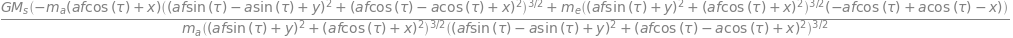

In [12]:
#Isolating x double dot

x_doubledot= solve(ELx, x_dot.diff(t))[0] 

x_doubledot

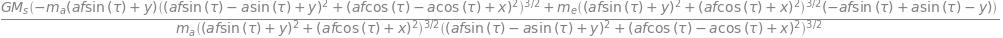

In [13]:
#Isolating y double dot

y_doubledot= solve(ELy, y_dot.diff(t))[0] #[0] to turn to not list, since gives list of solutions, but there's only 1 solution

y_doubledot

In [19]:
ELsubs={
mu: me*M/(M+me),
f: me/(M+me),
}

In [23]:
# #lambdify, give eq in terms of variables, gives its inputs, then lets you input the inputs in the expression. So turn symbolic math into python function 

fy = lambdify([x, y, a, G, tau, ma, M, me], y_doubledot.subs(ELsubs), 'numpy')

In [24]:
#lambdify, give eq in terms of variables, gives its inputs, then lets you input the inputs in the expression. So turn symbolic math into python function 

gx = lambdify((x, y, a, G, tau, ma, M, me), x_doubledot.subs(ELsubs), 'numpy') #can't print, is function

In [34]:
def three_body_prob(tau, Y, me, M, ma, G, a):
    x, w, y, z =Y #separates Y into 4 variables
    x_dot=w
    y_dot=z
    w_dot=gx(x, y, a, G, tau, ma, M, me)
    z_dot=fy(x, y, a, G, tau, ma, M, me)
    return x_dot, w_dot, y_dot, z_dot




In [ ]:
def three_body_prob_solveable(tau, Y):
    x, w, y, z =Y #separates Y into 4 variables
    me= 1e24
    ma= 100
    M= 1e30
    G= 1e-11
    a= 1e11

In [58]:
#solving the differential equation

#t_eval=t does more intermediate positions

t_2=np.linspace(0, 10, 1000) #a range, specifies gaps between numbers. linspace gives start, end, jump

initial_conditions= [1e5, 0, 2e11, 0] #x initial, y initial, x dot initial, y dot initial

xs, ws, ys, zs= solve_ivp(three_body_prob, (0, 10), initial_conditions, t_eval=t_2, args=(1e24, 1e30, 100, 1e-11, 1e11)).y #in the same order as defined above. Just returns the times you ask for

print(xs, ys)


[100000.] [2.e+11] [ 0.          0.01001001  0.02002002  0.03003003  0.04004004  0.05005005
  0.06006006  0.07007007  0.08008008  0.09009009  0.1001001   0.11011011
  0.12012012  0.13013013  0.14014014  0.15015015  0.16016016  0.17017017
  0.18018018  0.19019019  0.2002002   0.21021021  0.22022022  0.23023023
  0.24024024  0.25025025  0.26026026  0.27027027  0.28028028  0.29029029
  0.3003003   0.31031031  0.32032032  0.33033033  0.34034034  0.35035035
  0.36036036  0.37037037  0.38038038  0.39039039  0.4004004   0.41041041
  0.42042042  0.43043043  0.44044044  0.45045045  0.46046046  0.47047047
  0.48048048  0.49049049  0.5005005   0.51051051  0.52052052  0.53053053
  0.54054054  0.55055055  0.56056056  0.57057057  0.58058058  0.59059059
  0.6006006   0.61061061  0.62062062  0.63063063  0.64064064  0.65065065
  0.66066066  0.67067067  0.68068068  0.69069069  0.7007007   0.71071071
  0.72072072  0.73073073  0.74074074  0.75075075  0.76076076  0.77077077
  0.78078078  0.79079079  0.8008

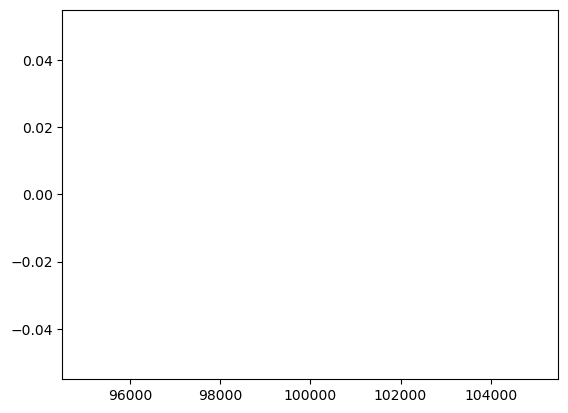

In [54]:
plt.plot(xs, ys)